In [1]:
import pandas as pd
import numpy as np
import zipfile
import os

In [ ]:
# Unzip and rename the dataset
with zipfile.ZipFile('netflix_data.zip', 'r') as zip_ref:
    zip_ref.extractall('netflix_data')


for file in os.listdir('netflix_data'):
    if file.endswith('.csv'):  
        os.rename(f'netflix_data/{file}', 'netflix_shows_movies.csv')


df = pd.read_csv('netflix_shows_movies.csv')

In [ ]:
# Address missing values
df.fillna({'column_name': 'default_value'}, inplace=True)  
print("Missing values handled.")

Missing values handled.


In [5]:
# Describe the data
print(df.describe())

            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000


In [ ]:
# Basic data exploration
print(df.describe(include='all'))


if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  
    print(f"\nAverage rating: {df['rating'].mean()}")


if 'type' in df.columns:
    print("\nUnique show types:")
    print(df['type'].value_counts())


print("\nFirst few rows:")
print(df.head())


             show_id   type        title                director  \
count   6.234000e+03   6234         6234                    4265   
unique           NaN      2         6172                    3301   
top              NaN  Movie  The Silence  Raúl Campos, Jan Suter   
freq             NaN   4265            3                      18   
mean    7.670368e+07    NaN          NaN                     NaN   
std     1.094296e+07    NaN          NaN                     NaN   
min     2.477470e+05    NaN          NaN                     NaN   
25%     8.003580e+07    NaN          NaN                     NaN   
50%     8.016337e+07    NaN          NaN                     NaN   
75%     8.024489e+07    NaN          NaN                     NaN   
max     8.123573e+07    NaN          NaN                     NaN   

                      cast        country       date_added  release_year  \
count                 5664           5758             6223    6234.00000   
unique                5469     

C:\Users\USER\AppData\Local\Temp\ipykernel_10072\1325039784.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


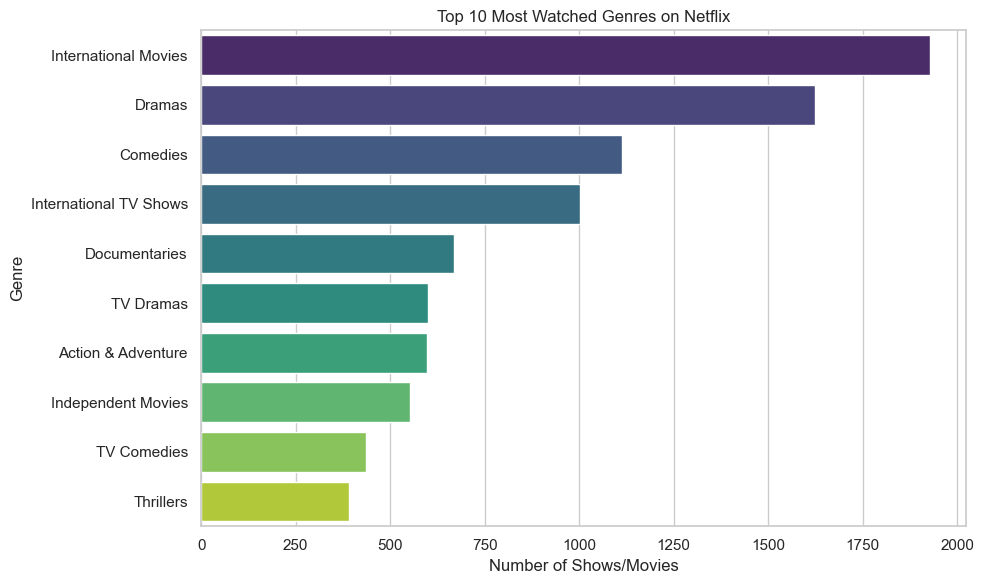

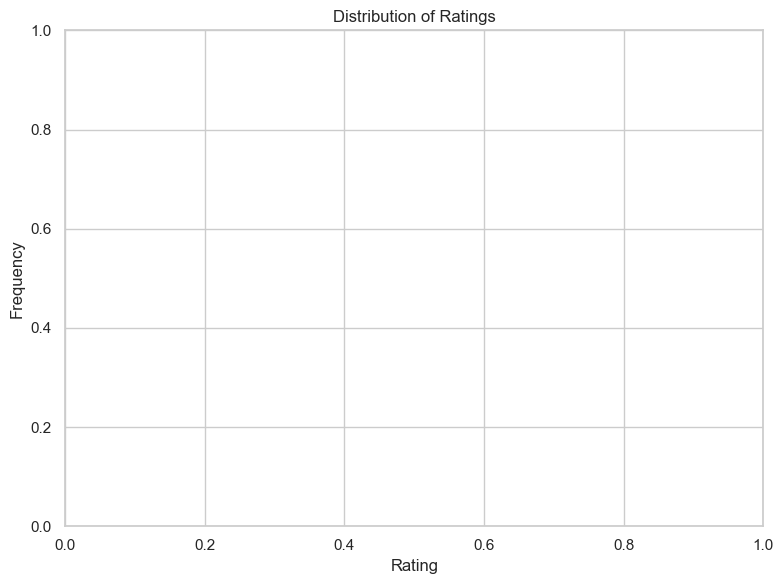

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')




if 'listed_in' in df.columns:
    genre_series = df['listed_in'].dropna().str.split(', ')
    exploded_genres = genre_series.explode()
    top_genres = exploded_genres.value_counts().head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
    plt.title('Top 10 Most Watched Genres on Netflix')
    plt.xlabel('Number of Shows/Movies')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()




if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df_cleaned = df.dropna(subset=['rating'])  

    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned['rating'], kde=True, bins=20, color='skyblue')
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
